In [72]:
###選秀節目中影響得票數的因素

In [3]:
##資料來源與說明
#由維基百科上蒐集produce101選秀節目共三季的資料並彙整
#節目選秀方式分為四個階段淘汰參賽者，且只取最終階段(第四個階段)進行分析
#投票方式是只能為韓國國民才能為參賽者投票
#第一季與第三季的參賽者為女性，第二季的參賽者則為男性

In [1]:
##變數定義
#name=參賽者姓名
#season=第幾季(共三季)_
#stage=第幾階段(這裡只取第四階段)
#vote=參賽著得票數(單位：萬)
#search=參賽者之間搜尋量的比較
#age=參賽者年齡
#beauty=參賽者之間相互評價顏值,若其排名進前11名為1，否則為0
#reputation=若參賽者之前出道過或參與過其他選秀節目為1，否則為0
#korean=因第三季為日韓合作(擁有日韓兩國的參賽者，人數大約各半)，若為韓國人為1,日本人為0

In [2]:
import statsmodels.api as sm #線性模型
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd = pd.read_csv("C:/Users/user/Desktop/produce101.csv")
pd.shape

(62, 9)

In [3]:
pd.head()

,name,season,stage,vote,search,age,beauty,reputation,korean
0,Jeon So Mi,1,4,85.83,45.98448,15,1,1,1
1,Kim Se Jeong,1,4,52.54,24.62068,20,1,1,1
2,Choi Yoo Jung,1,4,43.88,27.57813,16,0,0,1
3,Kim Chung Ha,1,4,40.36,11.79078,20,0,0,1
4,Kim So Hye,1,4,22.97,17.73785,17,0,0,1


In [4]:
pd.tail()

,name,season,stage,vote,search,age,beauty,reputation,korean
57,Takahashi Juri,3,4,16.43,3.92853,20,0,1,0
58,Takeuchi Miyu,3,4,15.81,12.04978,22,0,1,0
59,Shitao Miu,3,4,12.91,6.63114,17,0,1,0
60,Park Hae Yoon,3,4,9.66,3.31566,21,0,0,1
61,Shiroma Miru,3,4,9.44,5.42410,20,1,1,0


In [5]:
##將三季的變數資料進行分類與敘述統計(取小數點後兩位)

In [6]:
#第一季的變數資料
pd_s1 = pd[pd["season"] == 1]
pd_s1 

,name,season,stage,vote,search,age,beauty,reputation,korean
0,Jeon So Mi,1,4,85.83,45.98448,15,1,1,1
1,Kim Se Jeong,1,4,52.54,24.62068,20,1,1,1
2,Choi Yoo Jung,1,4,43.88,27.57813,16,0,0,1
3,Kim Chung Ha,1,4,40.36,11.79078,20,0,0,1
4,Kim So Hye,1,4,22.97,17.73785,17,0,0,1
5,Zhou Jie Qiong,1,4,21.83,10.14635,17,1,1,0
6,Jung Chae Yeon,1,4,21.53,13.45495,18,1,1,1
7,Kim Do Yeon,1,4,20.01,8.22304,16,1,0,1
8,Kang Mi Na,1,4,17.38,5.91025,16,0,0,1
9,Lim Na Young,1,4,13.87,2.44694,20,0,0,1


In [7]:
#第一季的敘述統計
pd_s1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,22.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
stage,22.0,4.00,0.00,4.00,4.00,4.00,4.00,4.00
vote,22.0,21.24,19.02,4.08,11.96,13.54,21.76,85.83
search,22.0,9.97,10.81,1.55,3.29,5.62,12.41,45.98
age,22.0,18.73,2.43,15.00,17.00,18.50,20.00,25.00
beauty,22.0,0.32,0.48,0.00,0.00,0.00,1.00,1.00
reputation,22.0,0.32,0.48,0.00,0.00,0.00,1.00,1.00
korean,22.0,0.95,0.21,0.00,1.00,1.00,1.00,1.00


In [8]:
#第二季的變數資料
pd_s2 = pd[pd["season"] == 2]
pd_s2

,name,season,stage,vote,search,age,beauty,reputation,korean
22,Kang Daniel,2,4,157.88,17.12840,20,0,0,1
23,Park Ji Hoon,2,4,113.60,4.29878,17,1,0,1
24,Lee Dae Hwi,2,4,110.20,1.82614,16,0,0,1
25,Kim Jae Hwan,2,4,105.17,1.57308,20,0,1,1
26,Ong Seong Wu,2,4,98.48,6.24864,21,1,0,1
27,Park Woo Jin,2,4,93.74,2.45524,18,0,0,1
28,Lai Kuan Lin,2,4,90.59,15.95384,15,1,0,0
29,Yoon Ji Sung,2,4,90.21,1.36802,26,0,0,1
30,Hwang Min Hyun,2,4,86.27,3.13224,21,1,1,1
31,Bae Jin Young,2,4,80.77,1.66316,16,1,0,1


In [9]:
#第二季的敘述統計
pd_s2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,20.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00
stage,20.0,4.00,0.00,4.00,4.00,4.00,4.00,4.00
vote,20.0,80.36,30.63,22.71,64.34,79.90,94.92,157.88
search,20.0,4.95,5.79,0.58,1.52,2.14,5.48,19.39
age,20.0,19.30,3.06,15.00,16.75,20.00,21.25,26.00
beauty,20.0,0.40,0.50,0.00,0.00,0.00,1.00,1.00
reputation,20.0,0.40,0.50,0.00,0.00,0.00,1.00,1.00
korean,20.0,0.90,0.31,0.00,1.00,1.00,1.00,1.00


In [10]:
#第三季的變數資料
pd_48 = pd[pd["season"] == 3]
pd_48

,name,season,stage,vote,search,age,beauty,reputation,korean
42,Jang Won Young,3,4,33.84,8.89567,13,1,0,1
43,Miyawaki Sakura,3,4,31.61,18.39081,20,1,1,0
44,Jo Yu Ri,3,4,29.47,4.52376,16,0,1,1
45,Choi Ye Na,3,4,28.54,3.98267,18,0,0,1
46,An Yu Jin,3,4,28.05,7.06888,14,1,0,1
47,Yabuki Nako,3,4,26.18,7.34154,16,0,1,0
48,Kwon Eun Bi,3,4,25.02,9.79866,22,1,1,1
49,Kang Hye Won,3,4,24.84,8.79003,18,1,0,1
50,Honda Hitomi,3,4,24.04,3.88902,16,0,1,0
51,Kim Chae Won,3,4,23.82,1.43525,17,1,0,1


In [11]:
#第三季的敘述統計
pd_48.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
season,20.0,3.00,0.00,3.00,3.00,3.00,3.00,3.00
stage,20.0,4.00,0.00,4.00,4.00,4.00,4.00,4.00
vote,20.0,22.26,6.82,9.44,17.97,23.26,26.65,33.84
search,20.0,7.92,5.40,1.44,3.97,6.85,9.12,21.93
age,20.0,18.35,3.05,13.00,16.00,18.00,20.25,24.00
beauty,20.0,0.45,0.51,0.00,0.00,0.00,1.00,1.00
reputation,20.0,0.60,0.50,0.00,0.00,1.00,1.00,1.00
korean,20.0,0.60,0.50,0.00,0.00,1.00,1.00,1.00


In [12]:
##統計在最終階段中每季的總得票數

In [13]:
pd_ss= pd.groupby("season")
pd_vt = pd_ss["vote"].sum()
pd_vt

season
1     467.38
2    1607.20
3     445.24
Name: vote, dtype: float64

In [14]:
pd_vt.index

Int64Index([1, 2, 3], dtype='int64', name='season')

In [15]:
pd_vt.values

array([ 467.38, 1607.2 ,  445.24])

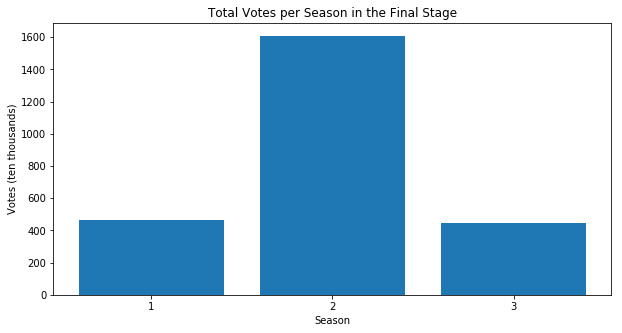

In [28]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(figsize=(10, 5))
votes = len(pd_vt.values)
plt.bar(range(votes), pd_vt.values)
plt.xticks(range(votes), pd_vt.index)
plt.title("Total Votes per Season in the Final Stage")
plt.xlabel("Season")
plt.ylabel("Votes (ten thousands)")
plt.show()

In [17]:
#由上圖可看出在最終階段中第二季的總得票數比第一季與第三季高出許多
#也表示參賽者為男性的總得票數會比女性多

In [18]:
##在最終階段中，每季參賽者的年齡是否會影響其得票數

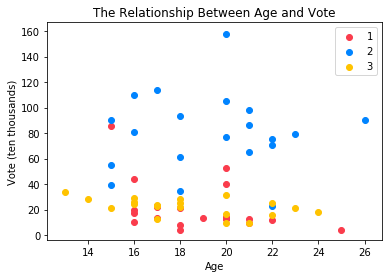

In [20]:
hex_colors = ["#fa3c4c", "#0084ff", "#ffc300"]
season = pd["season"].unique()
for col, ss in zip(hex_colors, season):
  subset_df = pd[pd["season"] == ss]
  plt.scatter(subset_df["age"], subset_df["vote"], color=col,label=ss)

plt.xlabel("Age")
plt.ylabel("Vote (ten thousands)")
plt.title("The Relationship Between Age and Vote")
plt.legend()
plt.show()

In [21]:
#由上圖可看出進入最終階段的多為年齡較小的參賽者且得票數較高

In [22]:
##在最終階段中，每季參賽者在參賽前的知名度是否會影響得票數

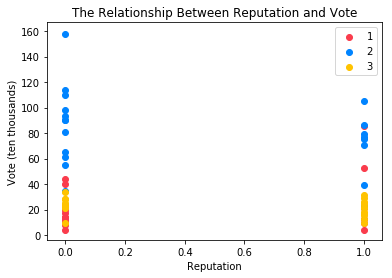

In [23]:
hex_colors = ["#fa3c4c", "#0084ff", "#ffc300"]
season = pd["season"].unique()
for col, ss in zip(hex_colors, season):
  subset_df = pd[pd["season"] == ss]
  plt.scatter(subset_df["reputation"], subset_df["vote"], color=col,label=ss)

plt.xlabel("Reputation")
plt.ylabel("Vote (ten thousands)")
plt.title("The Relationship Between Reputation and Vote")
plt.legend()
plt.show()

In [24]:
#由上圖可看出進入最終階段的多為參賽前無知名度的參賽者
#也可表示參賽者在參賽前的知名度並不會直接影響得票數的多寡

In [25]:
##在最終階段中，第三季的參賽者是否為韓國人與其得票數的關係

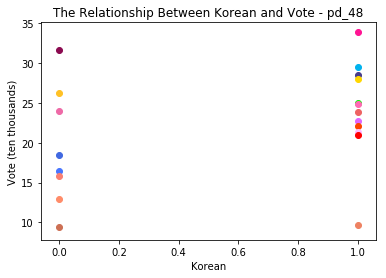

In [26]:
hex_colors = ["#ff1493", "#8b0a50", "#00b2ee", "#483d8b", "#ffd700", "#ffc125", "#00ff00", "#ff69b4", "#ee6aa7", "#ee6363", "#e066ff", "#ff4500", "#ffbbff", "#ff0000", "#4169e1", "#4876ff", "#fa8072", "#ff8c69", "#ee8262", "#cd7054"]
name = pd_48["name"].unique()
for col, name in zip(hex_colors, name):
  subset_df = pd_48[pd_48["name"] == name]
  plt.scatter(subset_df["korean"], subset_df["vote"], color=col, label=name)

plt.xlabel("Korean")
plt.ylabel("Vote (ten thousands)")
plt.legend.position=0
plt.title("The Relationship Between Korean and Vote - pd_48")
plt.show()

In [27]:
#由上圖可看出第三季進入最終階段的參賽者的多為韓國人且其得票數較高